In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')


## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance)

#testing data
mat = [[-1,-1,0,2,1],[2,0,0,-1,-1],[2,0,1,1,0]]

def my_pca(X,k):
    # data normalization
    X  = X.T
    X_mean = np.mean(X, axis = 0) # row means the number of samples. column is the number of features. so need the mean of every row
    X_nor = X - X_mean # data normalization
    
    #get corvariance matrix, the formula is X_nor.T * X_nor / n-1
    X_cov = np.cov(X_nor, rowvar=0) # get corvariance matrix; rowvar=1 means every column is a sample 
    eigenvalue, eigenvector = np.linalg.eig(X_cov) # get eigenvalue and eigenvector
    
    #sort
    eigenvalueInd = np.argsort(eigenvalue[::-1]) # Sort the eigenvalues from large to small,return index
    eigenvalue = eigenvalue[eigenvalueInd]
    eigenvector = eigenvector[:,eigenvalueInd]#sort eigenvectors
    
    #find out proper dimentions
    total = 0
    i = 0
    if k < 1:
        for i in range(len(eigenvalue)):
            total = total + eigenvalue[i]
            if (total/ np.sum(eigenvalue)) > 0.9:
                print(i)
                break
    else:
        i = k
    
    # convert n dimentions into k dimentions
    k_eigenvalueInd = eigenvalueInd[0:i:1] #select the first k eigenvalue,step =1
    k_eigenvector = eigenvector[:,k_eigenvalueInd] #Select the  eigenmatrix which is corresponding to k_eigenvalue
    
    X_new = X_nor.dot(k_eigenvector)
    
    return X_new
#testing
#my_pca(mat,0.9)

In this assignment,I decided add a new parameters so tha this function is suitable for many datasets, the user can just in put the dataset and the n_component they want,and will return the matrix that pictures showed in low dimentions.
In this function, the judgement on k is going to decide wheter to use pov or not.
This function successfully achieve reducing dimentions.
The stage of achievement:
1. The first step is centralise
2. get covariance matrix
3. calculate eigenvalue and eigenvector
4. sort eigenvalue and eigenvector from large to small
5. select suitable dimentions.
6. choose related eigenvector and eigenvector according to suitable dimentions.
7. calculate matrix that show picture in low dimentions.


### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# dual PCA (with svd)


def my_dual_pca(X):
    # data normalization
    
    d,n = X.shape
    X_mean = np.mean(X, axis = 1) # row means the number of samplexs. column is the number of features. so need the mean of every column
    X_nor = X.T - X_mean # data normalization
    X_mean = X_mean.reshape(X_mean.shape[0],1)
    # get Y ，Y = x^/sqrt(N-1)
    #use svd to get u metrix, v metrix and sigma metrix
    Y = X_nor / np.sqrt(n-1)
    U, Sigma, Vh = np.linalg.svd(Y)
    
    return Sigma**2 ,Vh,X_nor,X_mean
#testing
#my_dual_pca(mat)

In this assignment, I was asked to use svd to develop dual pca.
The relationship of PCA and SVD is:
1.Sigma(n,) represent eigenvalue, and will become priciple components(PCs) after reducing dimentions.
2.V(n*n) is eigenvector.
n is dimentions.

The step of achievement this function:
1. centralise data
2. get eigenvalue and eigenvector
3. return the square of eigenvalue, eigenvector, centralised data and the mean of data.

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [5]:
# Import dataset
iris = datasets.load_iris()
X = iris.data.T
y = iris.target

X.shape

(4, 150)

Text(0, 0.5, 'pc3')

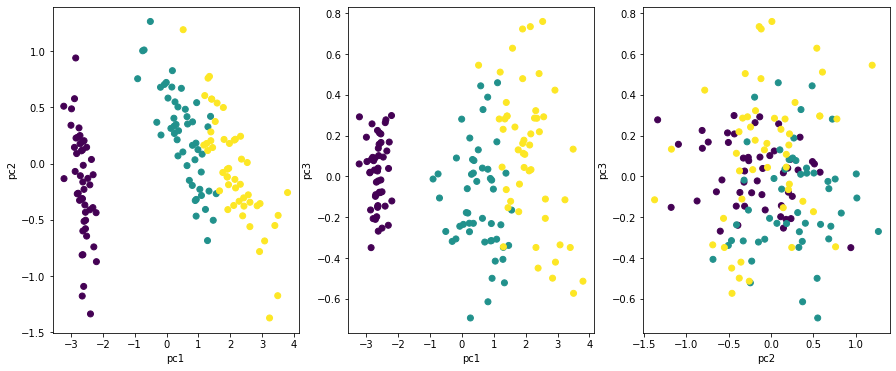

In [6]:
# Visualisation
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#X_r = pca.fit(X).transform(X)
X_r = my_pca(X,3)

#pc1 & pc2

x_pc1 = np.array(X_r)[:, 0] #pc1 as x-axis
y_pc2= np.array(X_r)[:, 1] #pc2 as y-axis
y_pc3= np.array(X_r)[:, 2] #pc3 as y-axis
x_pc2 = np.array(X_r)[:, 1] #pc2 as x-axis

plt.figure(figsize=(15,6))
plt.subplot(131)
plt.scatter(x_pc1, y_pc2, c = y)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.subplot(132)
plt.scatter(x_pc1, y_pc3, c = y)
plt.xlabel('pc1')
plt.ylabel('pc3')
plt.subplot(133)
plt.scatter(x_pc2, y_pc3, c = y)
plt.xlabel('pc2')
plt.ylabel('pc3')

In [7]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
1,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
2,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
3,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [8]:
y_df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### (a) plot the 2-D projection results on the PC1-PC2, PC1-PC3 and PC2-PC3 subspaces, respectively. In each plot, you are asked to use the first PC as x-axis and the second PC as y-axis in a specific PC pair, e.g., for the PC1-PC2, you should use PC1 as x-axis and PC2 as y-axis in the plot, 
To finish this function, I need first get the metrix that picture showed in low-dimentions. The first two represent 1-pc and 2-pc.
#### (b) based on three plots achieved in (a), describe any non-trivial properties you observe for this 4-D data set.
In the first picture, the three feature clearly separated. Three features represented in three color, there are few points overlap. Not only for that, In the three pictures, the points of the same feature are clustered closely in this picture.

In the second plot, the points of the same feature are a little scattered, but are well seperated.

In the third plot, every feature mixed together. we cannot get any useful information from this plot.

By showing all the information of datasets, we can see that the forth line of X_df is same with y_df. so we can ues the forth line of X to predict X.


### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

In [9]:
X, _ = np.load('./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]

In [10]:
# Image compression

Sigma,Vh,X_nor,X_mean = my_dual_pca(train_X)
# Automatically reduces dimension according to variance contribution rate
def X_recon(Sigma,Vh,X_nor,X_mean):
    Vh = Vh.T
    contribute = Sigma / np.sum(Sigma) #single variance
    total_contri = np.cumsum(contribute) 
    p = 0
    for p in range(len(Sigma)):
        if total_contri[p] > 0.9:
            print("The number of principal components is ",p+1)
            break
            
    eigen_face = Vh[:,:p+1]
    #Select the corresponding eigenvector, and you get p*
    X_new = eigen_face.T.dot(X_nor.T)  # eigen_face is pc metrix, X_new is datapoint in the new dimention,
    X_rec =  X_mean + eigen_face.dot(X_new) 
    
    return X_new,X_rec,eigen_face

X_new,X_rec,eigen_face= X_recon(Sigma,Vh,X_nor,X_mean)

The number of principal components is  33


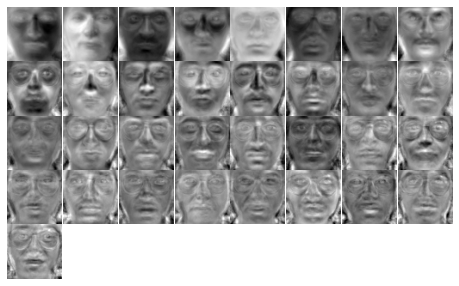

In [11]:
fig = plt.figure(figsize = (8,5))
grid = plt.GridSpec(5, 8, wspace=0, hspace=0)
for i in range (0,eigen_face.shape[1]):
    print_image(plt.subplot(grid[i//8,i%8]),eigen_face[:,i])
     

First, build recon function, so we can get dimentions reduced metrix by using PoV.
#### (a)describe how you can decide a number of principal components to enable you to establish a satisfactory image compression system for this data set;
By using Pov we can get the suitable PC for image compression.
formula:sum(S[i])/sum(S)
The molecule represents the sum of the distance between the original point and the projected point, and the smaller the error, the more complete the data before dimension reduction can be.If the error is less than 0.01, the reduced dimension data can retain 99% of the information.
#### (b) using the method given in (a), report the number of of principal components (eigenfaces), k, based on the experimental evidence; 
As we can see the number of best PC is 33.
#### (c) display the k eigenface images by using the provided print_image function.  Arrange k eigenface images according to their corresponding eigenvalues from large to small in a grid structure where each row contains 8 images (or fewer in the last row if k is not divisible by 8).

The eigenface of this question is Vh vector in SVD. use grid to plot all 33 picture. The eigenface means to extrat main feature of each picture.


### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

In [12]:
#use train eigenface in test set

# centralise
X_nor = test_X - X_mean
X_new = np.dot(eigen_face.T,X_nor) # low-dimensional representations of all the test images 
X_rec = X_mean + eigen_face.dot(X_new) 

In [13]:
# list all the low-dimensional representations of all the test images in a table in k×15 format;
import pandas as pd
df = pd.DataFrame(X_new) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2205.666817,-1484.295350,-554.936671,-343.233187,-541.880249,-2180.926795,1412.991768,-634.544692,-1056.321729,-914.510441,-1468.667884,-1471.467467,2191.593653,-195.491936,1260.054687
1,130.003249,996.201262,-999.273914,135.122207,-285.354412,2613.418103,-1380.506994,830.924068,1460.733313,-629.613019,1690.661572,1039.343562,338.045927,949.334556,303.695964
2,-700.394960,1491.448365,-590.945282,-316.157418,-1021.908340,330.316177,-1588.341234,-74.405947,991.926013,-161.458523,-2567.434067,-485.341432,284.163205,21.437154,-742.413177
3,621.239209,197.631649,702.729778,31.455406,721.581123,778.471536,-1320.935715,528.587939,207.610888,-344.835483,50.633247,720.622918,240.936573,411.049726,-45.678753
4,891.124991,1012.789628,-468.581265,690.901418,768.323295,232.950236,358.438459,294.253704,974.413376,-335.114789,-455.341113,921.593919,360.320516,-54.674270,709.310893
5,504.927318,1100.817200,-449.909658,1424.418163,259.157935,85.790305,-532.512711,485.214850,376.439554,105.436072,580.622444,-106.627623,1410.227037,888.662278,251.682714
6,607.215059,249.121195,370.995169,-105.529805,517.061191,320.645827,791.456294,610.577486,92.849137,183.358283,-458.202678,52.967030,147.720421,503.295350,-819.474710
7,430.078652,711.605375,-171.242505,-472.200889,-248.756279,-261.366812,62.483563,-783.798229,126.263238,-564.730288,-129.520653,-186.224356,686.920580,-638.305543,107.638581
8,207.285003,245.360661,62.015961,-332.582010,-41.291272,-425.477702,201.674079,-167.835227,-126.312705,550.254109,-417.649658,-146.657527,185.144783,-265.108079,-70.997618
9,395.546078,-549.538909,392.808300,293.507918,6.143064,489.102034,248.558848,-166.282007,-249.335510,181.842133,84.994720,49.950099,-565.423190,239.129142,-106.210176


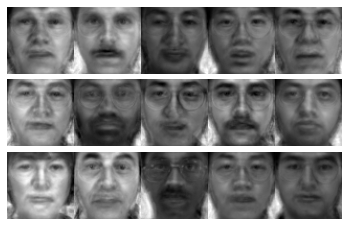

In [14]:
# display the reconstructed test images
fig = plt.figure()
grid = plt.GridSpec(3, 5, wspace=0, hspace=0)
for i in range (0,X_rec.shape[1]):
    print_image(plt.subplot(grid[i//5,i%5]),X_rec[:,i])

In [15]:
#error = test_X-X_rec.shape
# calculate the loss
def loss(data, recdata):
    sum_error = 0
    error = data - recdata
    for i in range(0,len(error)):
        sum_error += error[i]**2
    return sum_error

losses = []
for i in range(0,len(test_X.T)):
    losses.append(loss(test_X.T[i],X_rec.T[i]))
print(losses)

[1748892.9005947274, 1929744.1050899334, 1064940.2290209748, 1643078.9601435107, 828258.879427171, 2386429.7782736793, 1320288.0222232277, 2851488.931677695, 2836814.4665980963, 1633437.5346785304, 3212545.729399554, 2159383.6946224943, 2800279.415452429, 1978444.6722264925, 1200573.3604009084]


 #### (a) list all the low-dimensional representations of all the test images in a table in k×15 format; 
 I have already calculate the eigenface. So what I need to do is to use eigenface to get X~, and then get reconstructured metrix.The shape of each metrix is X~(samples,p), recon(samples,n-dimentions),eigenface()
 #### (b) display all the reconstructed test images by using the provided print_image function and arranging 15 test images in a 3 × 5 grid;
 The outcome can be seen in the second cell in this assignment.
 #### (c) describe a proper evaluation criterion for measuring the loss between an original raw and its corresponding reconstructed images;
 The total quadratic reconstruction error is measured by Error = sum(en) ,en =||x n − x˜n||^2 the summed squared length of all the blue lines shown below. Thus, we can formulate via minimising the total reconstruction error
 #### (d) program the evaluation criterion
 The outcome can be seen in the third cell in this assignment.

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [16]:
train_X, train_y, test_X, test_y = np.load('./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)
train_y.shape

(16,)

In [17]:
# Comparison
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# with the use of pca

#get eigenface of train set
Sigma,Vh,X_nor,X_mean = my_dual_pca(train_X)
X_new,X_rec,eigen_face= X_recon(Sigma,Vh,X_nor,X_mean)


#centralise
X_nor = train_X - X_mean

#get ow-dimensional representations of all the train images 
X_new = np.dot(eigen_face.T,X_nor) # low-dimensional representations of all the test images 

#get ow-dimensional representations of all the test images
X_nor1 = test_X - X_mean

#get low-dimensional representations of all the test images 
X_new1 = np.dot(eigen_face.T,X_nor1) # low-dimensional representations of all the test images 

# build model
clf1 = SVC(kernel='rbf')
clf1.fit(X_new.T,train_y)
pca_predict = clf1.predict(X_new1.T)

pca_acc = accuracy_score(y_pred = pca_predict,y_true=test_y)
pca_confusion_matrix = confusion_matrix(y_pred = pca_predict,y_true=test_y)
print("Accuracy score of no-pca is %.2f"%pca_acc)
print("confusion matrix of no-pca : \n",pca_confusion_matrix)


The number of principal components is  8
Accuracy score of no-pca is 0.83
confusion matrix of no-pca : 
 [[2 1]
 [0 3]]


In [18]:
#without the use of PCA
clf = SVC(kernel='rbf')
clf.fit(train_X.T,train_y)
predict = clf.predict(test_X.T)

pca_acc = accuracy_score(y_pred = predict,y_true=test_y)
pca_confusion_matrix = confusion_matrix(y_pred = predict,y_true=test_y)
print("Accuracy score of no-pca is %.2f"%pca_acc)
print("confusion matrix of no-pca : \n",pca_confusion_matrix)

Accuracy score of no-pca is 0.83
confusion matrix of no-pca : 
 [[2 1]
 [0 3]]


PCA
Step1:

reconstruct metrix using pca
Pca was applied to the training set and test set respectively.
If there are some mistake about the dimentions, you can reload train and test datasets.


### <span style="color:red">=========== End of Assignment 6 ===========</span>